### Zero-padding (Fourier resampling).

- CDGR Volume: 0.5 Hz to 200 Hz

- AVEAA PIP: 0.2 Hz to 100 Hz

- AVEAA PEEP: 0.2 Hz to 100 Hz

- AVEAA Volume: 0.2 Hz to 100 Hz

#### CDGR Volume: 0.5 Hz to 200 Hz

Original Volume Data Shape: (293849,)


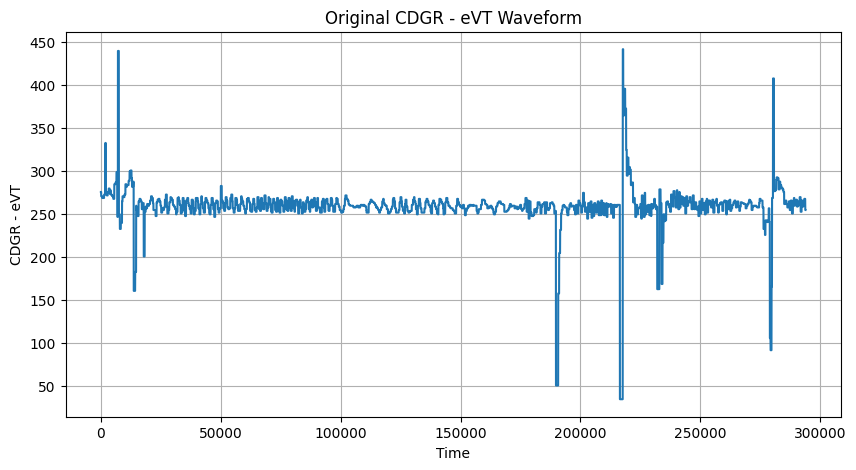

Resampled Volume Data Shape: (117539200,)


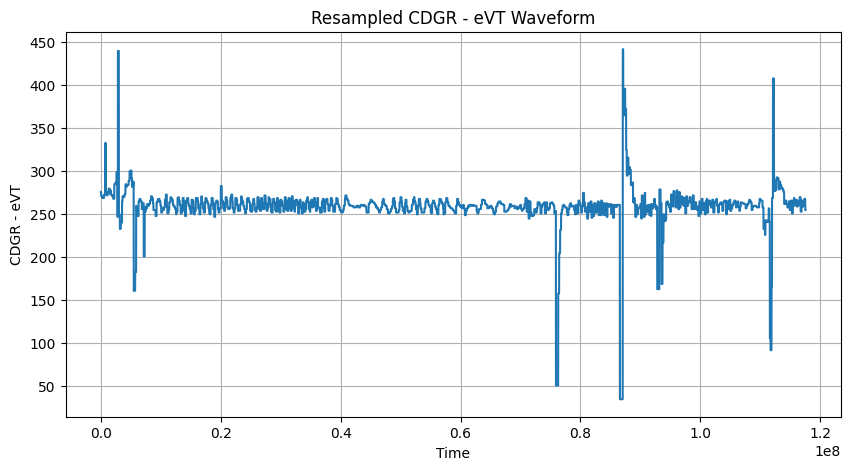

In [1]:
## (Code for individual sample):

# Load data

import pandas as pd

# Define the file path (CDGR ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_CDGR_39_1st/a-58_CDGR_39_1st_OSI/a-58_CDGR_39_1st_tw/a-58_CDGR_39_1st_twNo1st/a-58_CDGR_39_1st_cleaned/a_58_CDGR_39_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print("Original Volume Data Shape:", df['CDGR - eVT'].shape)

# Plot the original waveform
# CDGR volume time domain demo
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['CDGR - eVT'])
plt.xlabel('Time')
plt.ylabel('CDGR - eVT')
plt.title('Original CDGR - eVT Waveform')
plt.grid(True)
plt.show()

# Zero-padding for CDGR Volume data (from 0.5 Hz to 200 Hz)

import numpy as np
from scipy.interpolate import interp1d

# Original sampling rate (0.5 Hz) and target sampling rate (200 Hz)
original_sampling_rate = 0.5  # Hz
target_sampling_rate = 200  # Hz

# Original time points
original_time_points = np.arange(0, len(df['CDGR - eVT']) / original_sampling_rate, step=1/original_sampling_rate)

# Original data
original_data = df['CDGR - eVT']

# Target time points (resampled at 200 Hz)
target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

# Perform zero-padding (Fourier resampling)
interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
resampled_data = interpolator(target_time_points)

# Print the resampled volume data and its shape
print("Resampled Volume Data Shape:", resampled_data.shape)

# Plot the Resampled waveform
# CDGR volume time domain demo
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(resampled_data)
plt.xlabel('Time')
plt.ylabel('CDGR - eVT')
plt.title('Resampled CDGR - eVT Waveform')
plt.grid(True)
plt.show()

In [23]:
## 58_CDGR_39_1st cohort:
## Zero-padding for CDGR Volume data (from 0.5 Hz to 200 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_CDGR_39_1st/a-58_CDGR_39_1st_OSI/a-58_CDGR_39_1st_tw/a-58_CDGR_39_1st_twNo1st/a-58_CDGR_39_1st_cleaned/"

# Create a new directory to store modified files
new_directory = os.path.join(directory, "a-58_CDGR_39_1st_0padding")
os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.5 Hz) and target sampling rate (200 Hz)
        original_sampling_rate = 0.5  # Hz
        target_sampling_rate = 200  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['CDGR - eVT']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['CDGR - eVT']

        # Target time points (resampled at 200 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

        # # Print the resampled volume data and its shape
        # print("Resampled Volume Data Shape:", resampled_data.shape)
        
        # Update the DataFrame with resampled data
        df['CDGR - eVT'] = resampled_data
        
        # Save the modified DataFrame to a new CSV file in the new directory
        new_filepath = os.path.join(new_directory, filename)
        df.to_csv(new_filepath, index=False)

In [ ]:
## (Code for check result):

# Load data

import pandas as pd

# Define the file path (CDGR ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_CDGR_39_1st/a-58_CDGR_39_1st_OSI/a-58_CDGR_39_1st_tw/a-58_CDGR_39_1st_twNo1st/a-58_CDGR_39_1st_cleaned/a_58_CDGR_39_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# print("Original Volume Data Shape:", df['CDGR - eVT'].shape)
print("Original Volume Data Shape:", df['CDGR - eVT'].shape)

# Plot the original waveform
# CDGR volume time domain demo
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['CDGR - eVT'])
plt.xlabel('Time')
plt.ylabel('CDGR - eVT')
plt.title('Original CDGR - eVT Waveform')
plt.grid(True)
plt.show()


# Define the file path (CDGR ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_CDGR_39_1st/a-58_CDGR_39_1st_OSI/a-58_CDGR_39_1st_tw/a-58_CDGR_39_1st_twNo1st/a-58_CDGR_39_1st_cleaned/a-58_CDGR_39_1st_0padding/a_58_CDGR_39_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# print("Resampled Volume Data Shape:", df['CDGR - eVT'].shape)
print("Resampled Volume Data Shape:", df['CDGR - eVT'].shape)

# Plot the Resampled waveform
# CDGR volume time domain demo
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['CDGR - eVT'])
plt.xlabel('Time')
plt.ylabel('CDGR - eVT')
plt.title('Resampled CDGR - eVT Waveform')
plt.grid(True)
plt.show()

In [27]:
## 151_CDGR_11_1st cohort:
## Zero-padding for CDGR Volume data (from 0.5 Hz to 200 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/b-CDGR+AVEAA+SVU(151)_20240205/b-151_CDGR_11_1st/b-151_CDGR_11_1st_OSI/b-151_CDGR_11_1st_tw/b-151_CDGR_11_1st_twNo1st/b-151_CDGR_11_1st_cleaned/"

# Create a new directory to store modified files
new_directory = os.path.join(directory, "b-151_CDGR_11_1st_0padding")
os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.5 Hz) and target sampling rate (200 Hz)
        original_sampling_rate = 0.5  # Hz
        target_sampling_rate = 200  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['CDGR - eVT']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['CDGR - eVT']

        # Target time points (resampled at 200 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

        # # Print the resampled volume data and its shape
        # print("Resampled Volume Data Shape:", resampled_data.shape)
        
        # Update the DataFrame with resampled data
        df['CDGR - eVT'] = resampled_data
            
        # Save the modified DataFrame to a new CSV file in the new directory
        new_filepath = os.path.join(new_directory, filename)
        df.to_csv(new_filepath, index=False)

#### AVEAA PIP: 0.2 Hz to 100 Hz

Original PIP Data Shape: (296072,)


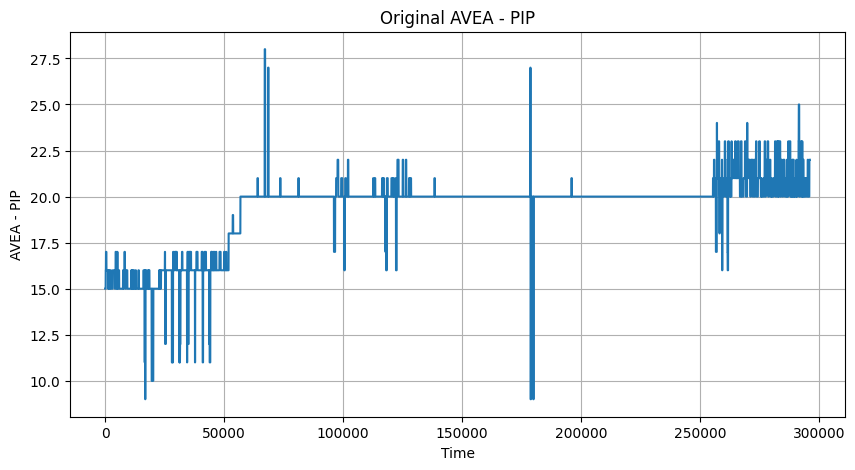

Resampled PIP Data Shape: (148035500,)


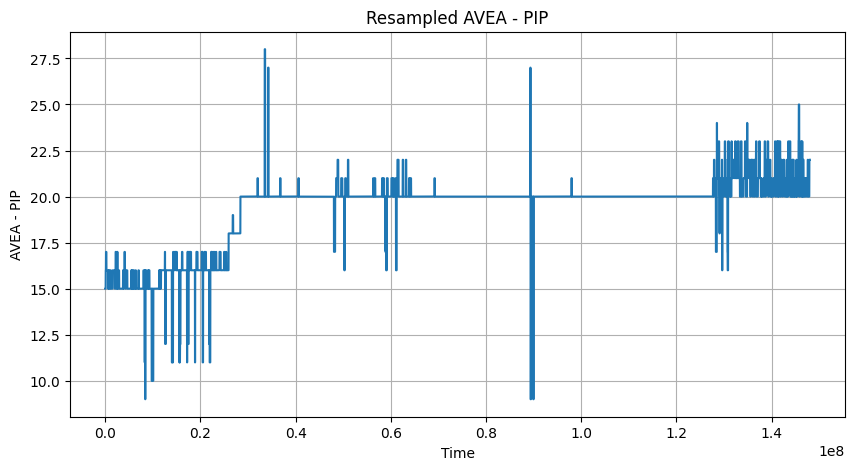

In [28]:
## (Code for individual sample):

# Load data

import pandas as pd

# Define the file path (AVEAA ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a_58_AVEAA_4_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print("Original PIP Data Shape:", df['AVEA - PIP'].shape)

# Plot the original waveform
# AVEAA PIP time domain demo
import matplotlib.pyplot as plt

# Plot the original waveform
plt.figure(figsize=(10, 5))
plt.plot(df['AVEA - PIP'])
plt.xlabel('Time')
plt.ylabel('AVEA - PIP')
plt.title('Original AVEA - PIP')
plt.grid(True)
plt.show()

# Zero-padding for AVEAA PIP data (from 0.2 Hz to 100 Hz)

import numpy as np
from scipy.interpolate import interp1d

# Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
original_sampling_rate = 0.2  # Hz
target_sampling_rate = 100  # Hz

# Original time points
original_time_points = np.arange(0, len(df['AVEA - PIP']) / original_sampling_rate, step=1/original_sampling_rate)

# Original data
original_data = df['AVEA - PIP']

# Target time points (resampled at 100 Hz)
target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

# Perform zero-padding (Fourier resampling)
interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
resampled_data = interpolator(target_time_points)

# Print the resampled PIP data and its shape
print("Resampled PIP Data Shape:", resampled_data.shape)

# Plot the Resampled waveform
# AVEAA PIP time domain demo
import matplotlib.pyplot as plt

# Plot the Resampled waveform
plt.figure(figsize=(10, 5))
plt.plot(resampled_data)
plt.xlabel('Time')
plt.ylabel('AVEA - PIP')
plt.title('Resampled AVEA - PIP')
plt.grid(True)
plt.show()

In [9]:
## 58_AVEAA_4_1st cohort:
# Zero-padding for AVEAA PIP data (from 0.2 Hz to 100 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/"

# Create a new directory to store modified files
new_directory = os.path.join(directory, "a-58_AVEAA_4_1st_0padding")
os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
        original_sampling_rate = 0.2  # Hz
        target_sampling_rate = 100  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['AVEA - PIP']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['AVEA - PIP']

        # Target time points (resampled at 100 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

        # # Print the resampled PIP data and its shape
        # print("Resampled PIP Data Shape:", resampled_data.shape)
        
        # Update the DataFrame with resampled data
        df['AVEA - PIP'] = resampled_data
            
        # Save the modified DataFrame to a new CSV file in the new directory
        new_filepath = os.path.join(new_directory, filename)
        df.to_csv(new_filepath, index=False)

Original Volume Data Shape: (293849,)


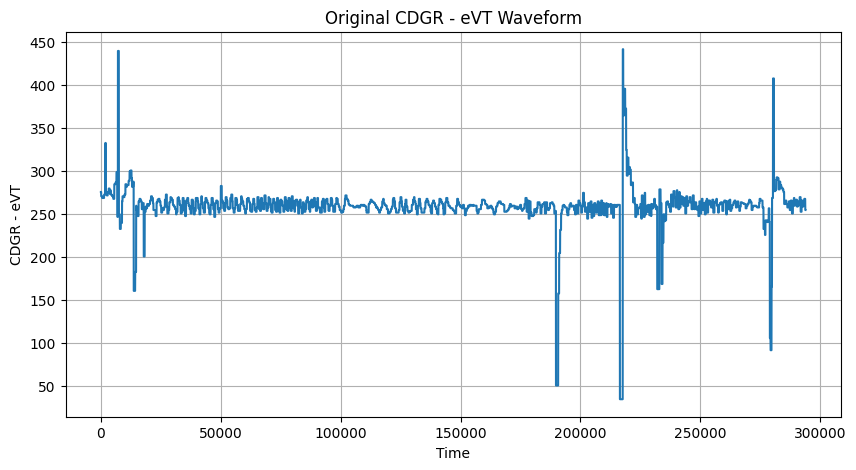

Resampled Volume Data Shape: (293849,)


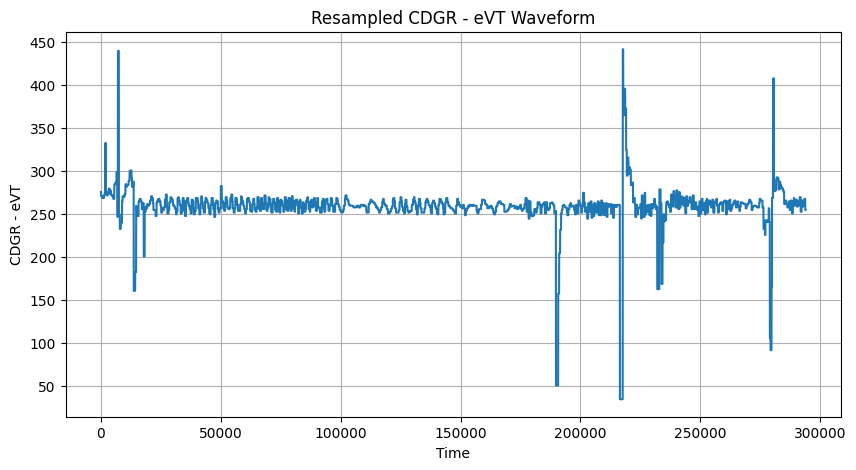

In [26]:
## (Code for check result):

# Load data

import pandas as pd

# Define the file path (AVEAA ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a_58_CDGR_39_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print("Original Volume Data Shape:", df['AVEA - PIP'].shape)

# Plot the original waveform
# AVEAA PIP time domain demo
import matplotlib.pyplot as plt

# Plot the original waveform
plt.figure(figsize=(10, 5))
plt.plot(df['AVEA - PIP'])
plt.xlabel('Time')
plt.ylabel('AVEA - PIP')
plt.title('Original AVEA - PIP')
plt.grid(True)
plt.show()


# Define the file path (AVEAA ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a-58_AVEAA_4_1st_0padding/a_58_CDGR_39_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print("Resampled Volume Data Shape:", df['AVEA - PIP'].shape)

# Plot the Resampled waveform
# AVEAA PIP time domain demo
import matplotlib.pyplot as plt

# Plot the Resampled waveform
plt.figure(figsize=(10, 5))
plt.plot(resampled_data)
plt.xlabel('Time')
plt.ylabel('AVEA - PIP')
plt.title('Resampled AVEA - PIP')
plt.grid(True)
plt.show()

In [30]:
## 151_AVEAA_4_1st cohort:
# Zero-padding for AVEAA PIP data (from 0.2 Hz to 100 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/b-CDGR+AVEAA+SVU(151)_20240205/b-151_AVEAA_4_1st/b-151_AVEAA_4_1st_OSI/b-151_AVEAA_4_1st_tw/b-151_AVEAA_4_1st_twNo1st/b-151_AVEAA_4_1st_cleaned/"

# Create a new directory to store modified files
new_directory = os.path.join(directory, "b-151_AVEAA_4_1st_0padding")
os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
        original_sampling_rate = 0.2  # Hz
        target_sampling_rate = 100  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['AVEA - PIP']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['AVEA - PIP']

        # Target time points (resampled at 100 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

        # # Print the resampled PIP data and its shape
        # print("Resampled PIP Data Shape:", resampled_data.shape)
        
        # Update the DataFrame with resampled data
        df['AVEA - PIP'] = resampled_data
            
        # Save the modified DataFrame to a new CSV file in the new directory
        new_filepath = os.path.join(new_directory, filename)
        df.to_csv(new_filepath, index=False)

#### AVEAA PEEP: 0.2 Hz to 100 Hz

Original PEEP Data Shape: (296072,)


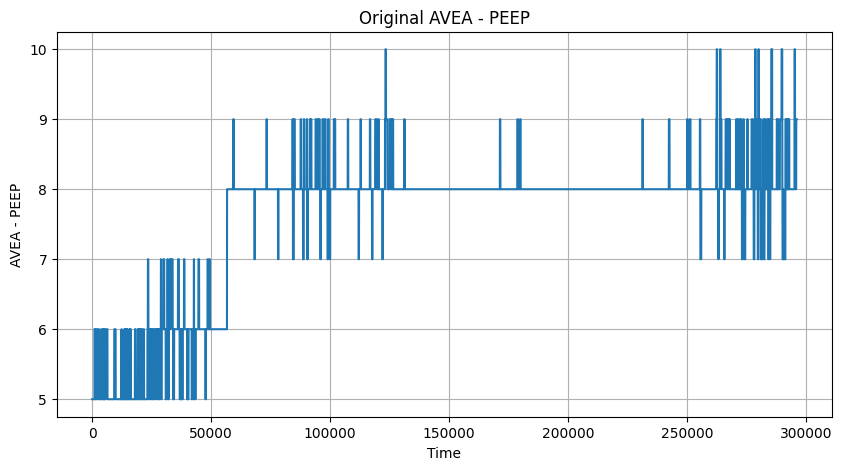

Resampled PEEP Data Shape: (148035500,)


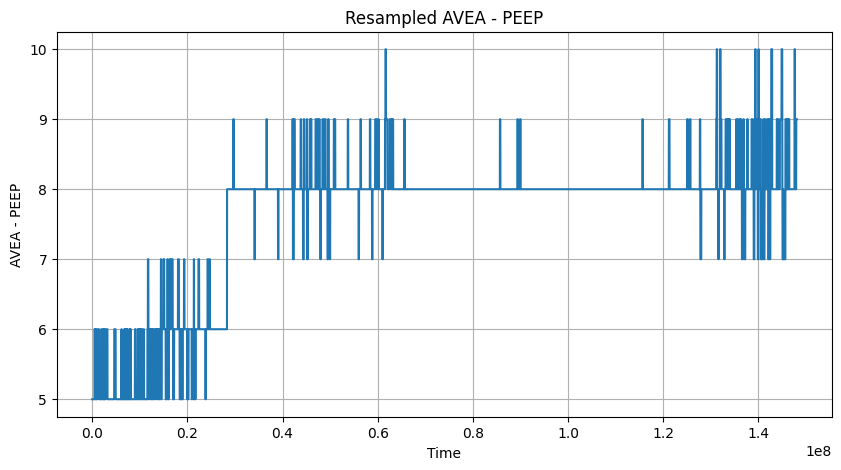

In [31]:
## (Code for individual sample):

# Load data

import pandas as pd

# Define the file path (AVEAA ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a_58_AVEAA_4_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print("Original PEEP Data Shape:", df['AVEA - PEEP'].shape)

# Plot the original waveform
# AVEAA PEEP time domain demo
import matplotlib.pyplot as plt

# Plot the original waveform
plt.figure(figsize=(10, 5))
plt.plot(df['AVEA - PEEP'])
plt.xlabel('Time')
plt.ylabel('AVEA - PEEP')
plt.title('Original AVEA - PEEP')
plt.grid(True)
plt.show()

# Zero-padding for AVEAA PEEP data (from 0.2 Hz to 100 Hz)

import numpy as np
from scipy.interpolate import interp1d

# Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
original_sampling_rate = 0.2  # Hz
target_sampling_rate = 100  # Hz

# Original time points
original_time_points = np.arange(0, len(df['AVEA - PEEP']) / original_sampling_rate, step=1/original_sampling_rate)

# Original data
original_data = df['AVEA - PEEP']

# Target time points (resampled at 100 Hz)
target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

# Perform zero-padding (Fourier resampling)
interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
resampled_data = interpolator(target_time_points)

# Print the resampled PEEP data and its shape
print("Resampled PEEP Data Shape:", resampled_data.shape)

# Plot the Resampled waveform
# AVEAA PEEP time domain demo
import matplotlib.pyplot as plt

# Plot the Resampled waveform
plt.figure(figsize=(10, 5))
plt.plot(resampled_data)
plt.xlabel('Time')
plt.ylabel('AVEA - PEEP')
plt.title('Resampled AVEA - PEEP')
plt.grid(True)
plt.show()

In [32]:
## 58_AVEAA_4_1st cohort:
# Zero-padding for AVEAA PEEP data (from 0.2 Hz to 100 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a-58_AVEAA_4_1st_0padding/"

# # Create a new directory to store modified files
# new_directory = os.path.join(directory, "a-58_AVEAA_4_1st_0padding")
# os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
        original_sampling_rate = 0.2  # Hz
        target_sampling_rate = 100  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['AVEA - PEEP']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['AVEA - PEEP']

        # Target time points (resampled at 100 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

        # # Print the resampled PEEP data and its shape
        # print("Resampled PEEP Data Shape:", resampled_data.shape)
            
        # Save the modified DataFrame to a new CSV file in the new directory
        # new_filepath = os.path.join(new_directory, filename)
        df.to_csv(filename, index=False)

In [33]:
## 151_AVEAA_4_1st cohort:
# Zero-padding for AVEAA PEEP data (from 0.2 Hz to 100 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/b-CDGR+AVEAA+SVU(151)_20240205/b-151_AVEAA_4_1st/b-151_AVEAA_4_1st_OSI/b-151_AVEAA_4_1st_tw/b-151_AVEAA_4_1st_twNo1st/b-151_AVEAA_4_1st_cleaned/b-151_AVEAA_4_1st_0padding/"

# # Create a new directory to store modified files
# new_directory = os.path.join(directory, "b-151_AVEAA_4_1st_0padding")
# os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
        original_sampling_rate = 0.2  # Hz
        target_sampling_rate = 100  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['AVEA - PEEP']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['AVEA - PEEP']

        # Target time points (resampled at 100 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

#         # Print the resampled PEEP data and its shape
#         print("Resampled PEEP Data Shape:", resampled_data.shape)

        # Update the DataFrame with resampled data
        df['AVEA - PEEP'] = resampled_data
            
        # Save the modified DataFrame to a new CSV file in the new directory
        # new_filepath = os.path.join(new_directory, filename)
        df.to_csv(filename, index=False)

#### AVEAA Volume: 0.2 Hz to 100 Hz

Original Volume Data Shape: (296072,)


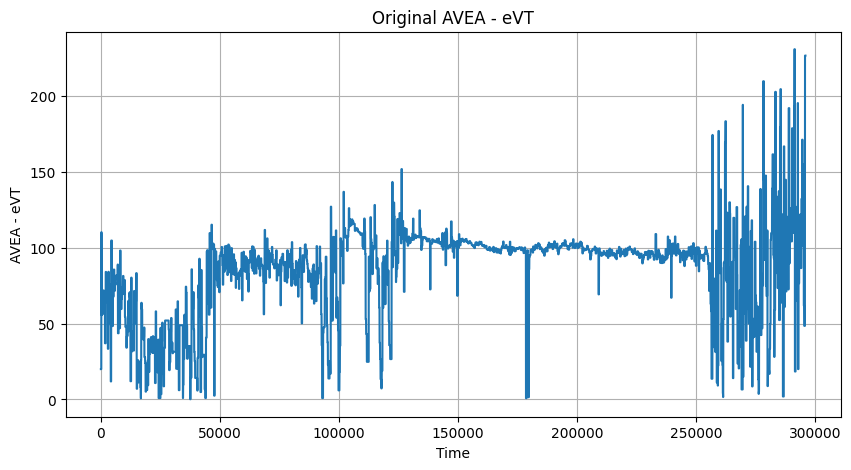

Resampled Volume Data Shape: (148035500,)


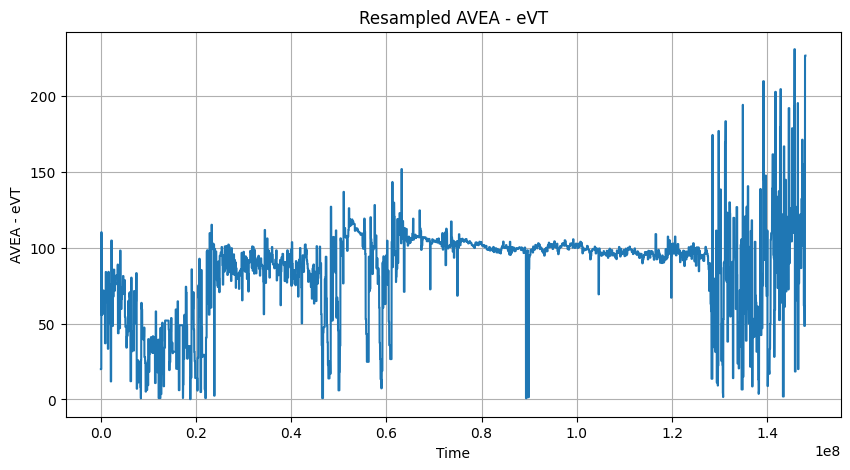

In [34]:
## (Code for individual sample):

# Load data

import pandas as pd

# Define the file path (AVEAA ventilator)
file_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a_58_AVEAA_4_1st (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print("Original Volume Data Shape:", df['AVEA - eVT'].shape)

# Plot the original waveform
# AVEAA volume time domain demo
import matplotlib.pyplot as plt

# Plot the original waveform
plt.figure(figsize=(10, 5))
plt.plot(df['AVEA - eVT'])
plt.xlabel('Time')
plt.ylabel('AVEA - eVT')
plt.title('Original AVEA - eVT')
plt.grid(True)
plt.show()

# Zero-padding for AVEAA Volume data (from 0.2 Hz to 100 Hz)

import numpy as np
from scipy.interpolate import interp1d

# Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
original_sampling_rate = 0.2  # Hz
target_sampling_rate = 100  # Hz

# Original time points
original_time_points = np.arange(0, len(df['AVEA - eVT']) / original_sampling_rate, step=1/original_sampling_rate)

# Original data
original_data = df['AVEA - eVT']

# Target time points (resampled at 100 Hz)
target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

# Perform zero-padding (Fourier resampling)
interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
resampled_data = interpolator(target_time_points)

# Print the resampled volume data and its shape
print("Resampled Volume Data Shape:", resampled_data.shape)

# Plot the Resampled waveform
# AVEAA volume time domain demo
import matplotlib.pyplot as plt

# Plot the Resampled waveform
plt.figure(figsize=(10, 5))
plt.plot(resampled_data)
plt.xlabel('Time')
plt.ylabel('AVEA - eVT')
plt.title('Resampled AVEA - eVT')
plt.grid(True)
plt.show()

In [35]:
## 58_AVEAA_4_1st cohort:
# Zero-padding for AVEAA Volume data (from 0.2 Hz to 100 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/a-CDGR+AVEAA+SVU(58)_20240205/a-58_AVEAA_4_1st/a-58_AVEAA_4_1st_OSI/a-58_AVEAA_4_1st_tw/a-58_AVEAA_4_1st_twNo1st/a-58_AVEAA_4_1st_cleaned/a-58_AVEAA_4_1st_0padding/"

# # Create a new directory to store modified files
# new_directory = os.path.join(directory, "a-58_AVEAA_4_1st_0padding")
# os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
        original_sampling_rate = 0.2  # Hz
        target_sampling_rate = 100  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['AVEA - eVT']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['AVEA - eVT']

        # Target time points (resampled at 100 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

        # # Print the resampled volume data and its shape
        # print("Resampled Volume Data Shape:", resampled_data.shape)
        
        # Update the DataFrame with resampled data
        df['AVEA - PEEP'] = resampled_data
            
        # Save the modified DataFrame to a new CSV file in the new directory
        # new_filepath = os.path.join(new_directory, filename)
        df.to_csv(filename, index=False)

In [36]:
## 151_AVEAA_4_1st cohort:
# Zero-padding for AVEAA Volume data (from 0.2 Hz to 100 Hz)

import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

directory = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/b-CDGR+AVEAA+SVU(151)_20240205/b-151_AVEAA_4_1st/b-151_AVEAA_4_1st_OSI/b-151_AVEAA_4_1st_tw/b-151_AVEAA_4_1st_twNo1st/b-151_AVEAA_4_1st_cleaned/b-151_AVEAA_4_1st_0padding/"

# # Create a new directory to store modified files
# new_directory = os.path.join(directory, "b-151_AVEAA_4_1st_0padding")
# os.makedirs(new_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)
        
        # Original sampling rate (0.2 Hz) and target sampling rate (100 Hz)
        original_sampling_rate = 0.2  # Hz
        target_sampling_rate = 100  # Hz

        # Original time points
        original_time_points = np.arange(0, len(df['AVEA - eVT']) / original_sampling_rate, step=1/original_sampling_rate)

        # Original data
        original_data = df['AVEA - eVT']

        # Target time points (resampled at 100 Hz)
        target_time_points = np.arange(0, original_time_points[-1], step=1/target_sampling_rate)

        # Perform zero-padding (Fourier resampling)
        interpolator = interp1d(original_time_points, original_data, kind='linear', fill_value='extrapolate')
        resampled_data = interpolator(target_time_points)

#         # Print the resampled volume data and its shape
#         print("Resampled Volume Data Shape:", resampled_data.shape)

        # Update the DataFrame with resampled data
        df['AVEA - PEEP'] = resampled_data
            
        # Save the modified DataFrame to a new CSV file in the new directory
        # new_filepath = os.path.join(new_directory, filename)
        df.to_csv(filename, index=False)